This notebook creates bar plots that visualize how various benchmark algorithms compare against NCMF, in terms of AUC and MRR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
def get_err_sd_list(fname,exp_idx_list):
    print("fname: ",fname)
    #create list of rmse/error and sd - one per pair per technique
    if "random" in fname:
        with open(fname) as f:
            data = json.load(f)
        df = pd.DataFrame(data).T
        df = df[:5]
        df.columns = ["params","avg_rmse_test","rmse_train","sd_test","sd_train"]
        df.index = df.index.map(float)
        df = df.sort_index()
    else:
        df = pd.read_json(fname).T
        df.index = df.index.map(float)
        df = df.sort_index()
    #idx of 3 experiments whose results has to be included in the chart
    exp_idx_list = list(np.array([exp_idx_list]) - 1)
    exp_rmse_list = []
    exp_sd_list = []
    for temp_idx in exp_idx_list:
        exp_rmse_list.append(df.iloc[temp_idx]["avg_rmse_test"])
        exp_sd_list.append(df.iloc[temp_idx]["sd_test"])    
    return list(np.array(exp_rmse_list)[0]), list(np.array(exp_sd_list)[0])  

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE1 = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname):
    ax = plt.subplot()
    temp_offset = 0.17
    b_list = []
    hatch_type_list = ['++','\\\\\\','xx','..','///']
    for i in np.arange(y_list.shape[0]):
        b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
        ax.errorbar(x+(i*temp_offset), y_list[i], yerr = e_list[i], color = 'k', ls = 'none', lw = 2, capthick = 2,fmt='--')
        b_list.append(b1)
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x + (temp_offset * 1.5))
    ax.set_xticklabels(x_tick_labels)
    ax.set_ylim([0.4,1])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for i in range(y_list.shape[0]):
        plt.text(x+(i*temp_offset) -0.075, y_list[i][0]+0.03, str(y_list[i][0]*100)[:5], fontsize=15)
#     ax.legend(tuple(b_list), tuple(tech_list), loc='upper left', ncol = 1, bbox_to_anchor = (1,1))
    plt.savefig(save_fname+".svg",bbox_inches = "tight")
    plt.savefig(save_fname+".png",bbox_inches = "tight")
    plt.tight_layout()
    return plt

In [3]:
# PubMed dataset - AUC
pubmed_auc_list_cmf = [0.5232]
pubmed_auc_sd_list_cmf = [0.0132]
pubmed_auc_list_gcmf = [0.4787]
pubmed_auc_sd_list_gcmf = [0.0123]
pubmed_auc_list_dfmf = [0.5623]
pubmed_auc_sd_list_dfmf = [0.0894]
pubmed_auc_list_dcmf = [0.5233]
pubmed_auc_sd_list_dcmf = [0.0252]
pubmed_auc_list_ncmf = [0.8596]
pubmed_auc_sd_list_ncmf = [0.0199]

# PubMed dataset - MRR
pubmed_mrr_list_cmf = [0.7776]
pubmed_mrr_sd_list_cmf = [0.0272]
pubmed_mrr_list_gcmf = [0.7515]
pubmed_mrr_sd_list_gcmf = [0.0165]
pubmed_mrr_list_dfmf = [0.8379]
pubmed_mrr_sd_list_dfmf = [0.1125]
pubmed_mrr_list_dcmf = [0.8242]
pubmed_mrr_sd_list_dcmf = [0.0841]
pubmed_mrr_list_ncmf = [0.9603]
pubmed_mrr_sd_list_ncmf = [0.0150]

In [4]:
x = np.array([1])
y_list = np.array([pubmed_auc_list_cmf,pubmed_auc_list_gcmf, pubmed_auc_list_dfmf, pubmed_auc_list_dcmf, pubmed_auc_list_ncmf]) 
e_list = np.array([pubmed_auc_sd_list_cmf, pubmed_auc_sd_list_gcmf, pubmed_auc_sd_list_dfmf, pubmed_auc_sd_list_dcmf, pubmed_auc_sd_list_ncmf])

In [5]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon','lightyellow']
tech_list = ['CMF','gCMF','DFMF','DCMF','NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

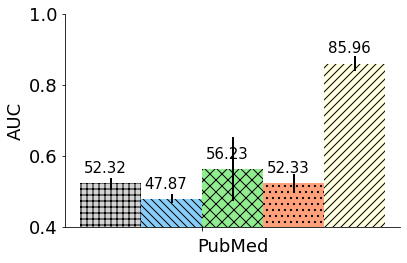

In [6]:
x_label = 'PubMed'
save_fname = "PubMed_MF_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)
# ax = fig.add_subplot(111)
# temp_offset = 0.17
# b_list = []
# hatch_type_list = ['++','\\\\\\','xx','..','///']
# for i in np.arange(y_list.shape[0]):
#     b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
#     b_list.append(b1)
# legendFig.legend(tuple(b_list), tuple(tech_list), loc='upper center', ncol = 3, mode = 'expand')
# legendFig.savefig("matrix_factorization_legend.png")

In [7]:
x = np.array([1])
y_list = np.array([pubmed_mrr_list_cmf,pubmed_mrr_list_gcmf, pubmed_mrr_list_dfmf, pubmed_mrr_list_dcmf, pubmed_mrr_list_ncmf]) 
e_list = np.array([pubmed_mrr_sd_list_cmf, pubmed_mrr_sd_list_gcmf, pubmed_mrr_sd_list_dfmf, pubmed_mrr_sd_list_dcmf, pubmed_mrr_sd_list_ncmf])

In [8]:
y_label = 'MRR'

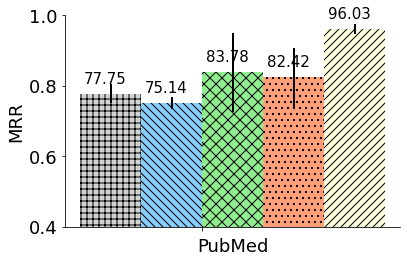

In [9]:
x_label = 'PubMed'
save_fname = "PubMed_MF_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

In [10]:
# MIMIC dataset - AUC
mimic_auc_list_cmf = [0.5006]
mimic_auc_sd_list_cmf = [0.0003]
mimic_auc_list_gcmf = [0.4979]
mimic_auc_sd_list_gcmf = [0.0006]
mimic_auc_list_dfmf = [0.7195]
mimic_auc_sd_list_dfmf = [0.1816]
mimic_auc_list_dcmf = [0.7280]
mimic_auc_sd_list_dcmf = [0.0070]
mimic_auc_list_ncmf = [0.8606]
mimic_auc_sd_list_ncmf = [0.0023]

# MIMIC dataset - MRR
mimic_mrr_list_cmf = [0.5845]
mimic_mrr_sd_list_cmf = [0.0051]
mimic_mrr_list_gcmf = [0.5923]
mimic_mrr_sd_list_gcmf = [0.0018]
mimic_mrr_list_dfmf = [0.7829]
mimic_mrr_sd_list_dfmf = [0.0416]
mimic_mrr_list_dcmf = [0.7607]
mimic_mrr_sd_list_dcmf = [0.0344]
mimic_mrr_list_ncmf = [0.9099]
mimic_mrr_sd_list_ncmf = [0.0127]

In [11]:
x = np.array([1])
y_list = np.array([mimic_auc_list_cmf,mimic_auc_list_gcmf, mimic_auc_list_dfmf, mimic_auc_list_dcmf, mimic_auc_list_ncmf]) 
e_list = np.array([mimic_auc_sd_list_cmf, mimic_auc_sd_list_gcmf, mimic_auc_sd_list_dfmf, mimic_auc_sd_list_dcmf, mimic_auc_sd_list_ncmf])

In [12]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon','lightyellow']
tech_list = ['CMF','gCMF','DFMF','DCMF','NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

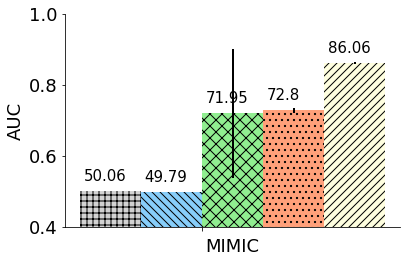

In [13]:
x_label = 'MIMIC'
save_fname = "MIMIC_MF_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)


In [14]:
x = np.array([1])
y_list = np.array([mimic_mrr_list_cmf,mimic_mrr_list_gcmf, mimic_mrr_list_dfmf, mimic_mrr_list_dcmf, mimic_mrr_list_ncmf]) 
e_list = np.array([mimic_mrr_sd_list_cmf, mimic_mrr_sd_list_gcmf, mimic_mrr_sd_list_dfmf, mimic_mrr_sd_list_dcmf, mimic_mrr_sd_list_ncmf])

In [15]:
y_label = 'MRR'

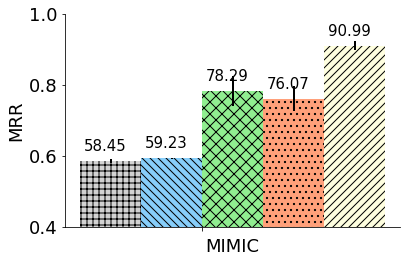

In [16]:
x_label = 'MIMIC'
save_fname = "MIMIC_MF_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

In [17]:
# Polypharmacy dataset - AUC
polypharmacy_auc_list_cmf = [0.5000]
polypharmacy_auc_sd_list_cmf = [0.0000]
polypharmacy_auc_list_gcmf = [0.5000]
polypharmacy_auc_sd_list_gcmf = [0.0000]
polypharmacy_auc_list_dfmf = [0.5018]
polypharmacy_auc_sd_list_dfmf = [0.0003]
polypharmacy_auc_list_dcmf = [0.8300]
polypharmacy_auc_sd_list_dcmf = [0.0069]
polypharmacy_auc_list_ncmf = [0.8459]
polypharmacy_auc_sd_list_ncmf = [0.0041]

# Polypharmacy dataset - MRR
polypharmacy_mrr_list_cmf = [0.4742]
polypharmacy_mrr_sd_list_cmf = [0.0114]
polypharmacy_mrr_list_gcmf = [0.4810]
polypharmacy_mrr_sd_list_gcmf = [0.0068]
polypharmacy_mrr_list_dfmf = [0.8382]
polypharmacy_mrr_sd_list_dfmf = [0.0070]
polypharmacy_mrr_list_dcmf = [0.8863]
polypharmacy_mrr_sd_list_dcmf = [0.0093]
polypharmacy_mrr_list_ncmf = [0.9035]
polypharmacy_mrr_sd_list_ncmf = [0.0008]

In [18]:
x = np.array([1])
y_list = np.array([polypharmacy_auc_list_cmf,polypharmacy_auc_list_gcmf, polypharmacy_auc_list_dfmf, polypharmacy_auc_list_dcmf, polypharmacy_auc_list_ncmf]) 
e_list = np.array([polypharmacy_auc_sd_list_cmf, polypharmacy_auc_sd_list_gcmf, polypharmacy_auc_sd_list_dfmf, polypharmacy_auc_sd_list_dcmf, polypharmacy_auc_sd_list_ncmf])

In [19]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon','lightyellow']
tech_list = ['CMF','gCMF','DFMF','DCMF','NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

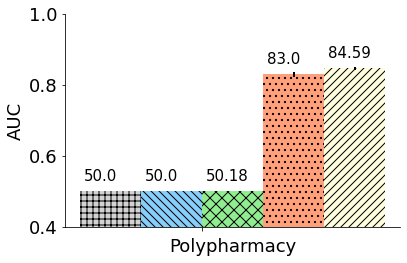

In [20]:
x_label = 'Polypharmacy'
save_fname = "Polypharmacy_MF_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)


In [21]:
x = np.array([1])
y_list = np.array([polypharmacy_mrr_list_cmf,polypharmacy_mrr_list_gcmf, polypharmacy_mrr_list_dfmf, polypharmacy_mrr_list_dcmf, polypharmacy_mrr_list_ncmf]) 
e_list = np.array([polypharmacy_mrr_sd_list_cmf, polypharmacy_mrr_sd_list_gcmf, polypharmacy_mrr_sd_list_dfmf, polypharmacy_mrr_sd_list_dcmf, polypharmacy_mrr_sd_list_ncmf])

In [22]:
y_label = 'MRR'

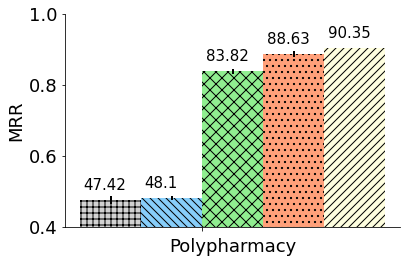

In [23]:
x_label = 'Polypharmacy'
save_fname = "Polypharmacy_MF_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

(0.4, 1.0)

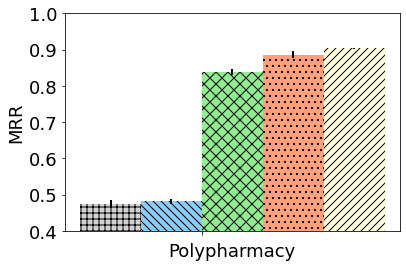

In [24]:
ax = plt.subplot()
temp_offset = 0.17
b_list = []
hatch_type_list = ['++','\\\\\\','xx','..','///']
for i in np.arange(y_list.shape[0]):
    b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
    ax.errorbar(x+(i*temp_offset), y_list[i], yerr = e_list[i], color = 'k', ls = 'none', lw = 2, capthick = 2,fmt='--')
    b_list.append(b1)

ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
ax.set_xticks(x + (temp_offset * 1.5))
ax.set_xticklabels(x_tick_labels)
ax.set_ylim([0.4,1])

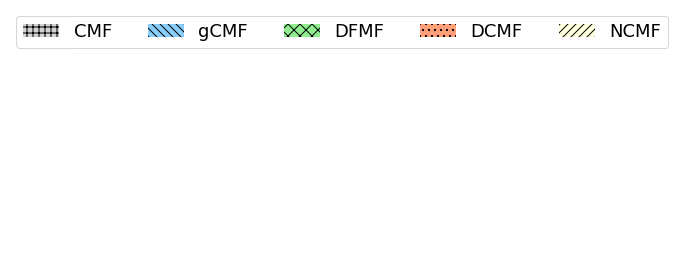

In [25]:
plt.legend(tuple(b_list), tuple(tech_list), loc='upper left', ncol = 5, bbox_to_anchor = (0,1))
plt.setp(plt.gca().spines.values(), visible=False) 
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("matrix_factorization_legend.png", bbox_inches="tight")